# Eman Furrukh

# 21i-1726

# Introduction to Data Science

# Project

In [1]:
!pip install opencv-python

In [2]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
#libraries 
import re
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.linear_model import LogisticRegression as lr
from sklearn import metrics

Text Processing

In [4]:
#load file into notebook
df = pd.read_csv('labels.csv')
df

,Unnamed: 0,image_name,text_ocr,text_corrected,overall_sentiment
0,0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive
2,2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4,4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...,...,...,...
6987,6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive


In [5]:
#drop coloumn
df = df.drop(columns = ['Unnamed: 0'])
df

,image_name,text_ocr,text_corrected,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,10 Year Challenge - Sweet Dee Edition,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,image_6991.jpg,When I VERY have time is a fantasy No one has ...,When I have time is a fantasy. no one has time...,very_positive


In [6]:
#drop another coloumn
df = df.drop(columns = ['text_ocr'])
df

,image_name,text_corrected,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,positive
3,image_4.png,10 Year Challenge - Sweet Dee Edition,positive
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,neutral
...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,neutral
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,neutral
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,positive
6990,image_6991.jpg,When I have time is a fantasy. no one has time...,very_positive


In [7]:
#filling Na with empty space
df=df.fillna("")

In [8]:
df["overall_sentiment"].value_counts()

positive         3127
neutral          2201
very_positive    1033
negative          480
very_negative     151
Name: overall_sentiment, dtype: int64

In [9]:
#replacing string with int for overall_sentiments
df=df.replace(to_replace ="very_positive", value =1)
df=df.replace(to_replace ="positive", value =1)
df=df.replace(to_replace ="very_negative", value =2)
df=df.replace(to_replace ="negative", value =2)
df=df.replace(to_replace ="neutral", value =0)
df

,image_name,text_corrected,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,1
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,1
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,1
3,image_4.png,10 Year Challenge - Sweet Dee Edition,1
4,image_5.png,10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...,0
...,...,...,...
6987,image_6988.jpg,Tuesday is Mardi Gras Wednesday is Valentine's...,0
6988,image_6989.jpg,MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...,0
6989,image_6990.png,LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...,1
6990,image_6991.jpg,When I have time is a fantasy. no one has time...,1


In [10]:
#Learn the vocabulary dictionary and return document-term matrix.
x =cv().fit_transform(df["text_corrected"]).toarray()
x.shape

(6992, 12927)

In [11]:
#converts 'text_corrected' to lower case
df["text_corrected"] = df["text_corrected"].str.lower()
df

,image_name,text_corrected,overall_sentiment
0,image_1.jpg,look there my friend lightyear now all sohalik...,1
1,image_2.jpeg,the best of #10 yearchallenge! completed in le...,1
2,image_3.JPG,sam thorne @strippin ( follow follow saw every...,1
3,image_4.png,10 year challenge - sweet dee edition,1
4,image_5.png,10 year challenge with no filter 47 hilarious ...,0
...,...,...,...
6987,image_6988.jpg,tuesday is mardi gras wednesday is valentine's...,0
6988,image_6989.jpg,must watch movies of 2017 iti chennai memes ma...,0
6989,image_6990.png,less more talking planning soda junk food comp...,1
6990,image_6991.jpg,when i have time is a fantasy. no one has time...,1


In [12]:
#removes special characters from coloumn 'text_corrected'
df['text_corrected'] = df['text_corrected'].str.replace('[^\w\s]', '')
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_17416\2661233903.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_corrected'] = df['text_corrected'].str.replace('[^\w\s]', '')


,image_name,text_corrected,overall_sentiment
0,image_1.jpg,look there my friend lightyear now all sohalik...,1
1,image_2.jpeg,the best of 10 yearchallenge completed in less...,1
2,image_3.JPG,sam thorne strippin follow follow saw everyon...,1
3,image_4.png,10 year challenge sweet dee edition,1
4,image_5.png,10 year challenge with no filter 47 hilarious ...,0
...,...,...,...
6987,image_6988.jpg,tuesday is mardi gras wednesday is valentines ...,0
6988,image_6989.jpg,must watch movies of 2017 iti chennai memes ma...,0
6989,image_6990.png,less more talking planning soda junk food comp...,1
6990,image_6991.jpg,when i have time is a fantasy no one has time ...,1


In [13]:
#dropping coloumn image_name
df2 = df.drop(columns = ['image_name'])
df2

,text_corrected,overall_sentiment
0,look there my friend lightyear now all sohalik...,1
1,the best of 10 yearchallenge completed in less...,1
2,sam thorne strippin follow follow saw everyon...,1
3,10 year challenge sweet dee edition,1
4,10 year challenge with no filter 47 hilarious ...,0
...,...,...
6987,tuesday is mardi gras wednesday is valentines ...,0
6988,must watch movies of 2017 iti chennai memes ma...,0
6989,less more talking planning soda junk food comp...,1
6990,when i have time is a fantasy no one has time ...,1


In [14]:
#over sampling the data
from imblearn.over_sampling import RandomOverSampler as ros
x,y=ros().fit_resample(x,df["overall_sentiment"])
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.19,shuffle=True)
X_test_text = X_test.copy() 
y_test_text = y_test.copy()
X_test.shape

(2372, 12927)

In [15]:
y_train

12338    2
11508    2
11771    2
7189     0
11292    2
        ..
2741     1
1635     0
31       1
7063     0
6232     1
Name: overall_sentiment, Length: 10108, dtype: int64

In [16]:
y_test

8714     0
11681    2
1777     1
6838     1
5735     0
        ..
6379     1
7910     0
5129     1
6556     0
7651     0
Name: overall_sentiment, Length: 2372, dtype: int64

In [17]:
#logistic Regression
model1=lr()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
from sklearn.metrics import accuracy_score, recall_score,confusion_matrix,precision_score,f1_score
confusion1=confusion_matrix(y_pred,y_test)
accuracy1=accuracy_score(y_pred,y_test)*100 
recall1=recall_score(y_pred,y_test,average="macro")
precision1=precision_score(y_pred,y_test,average="macro")
f1score1=f1_score(y_pred,y_test,average="weighted")

print(f"For Logistic Regression Accuracy is: {accuracy1} \nRecall_Score is: {recall1} \nPrecision: {precision1}\nF1_Score is: {f1score1}\nconfusion matrix is: \n{confusion1}")

For Logistic Regression Accuracy is: 76.89713322091062 
Recall_Score is: 0.765045159118897 
Precision: 0.7713629179716782
F1_Score is: 0.7763134281568951
confusion matrix is: 
[[624 251   7]
 [165 451   8]
 [ 29  88 749]]


In [19]:
#KNN
classifier_knn = KNeighborsClassifier(n_neighbors = 1)
classifier_knn.fit(X_train, y_train)
y_pred = classifier_knn.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7424114671163575


In [20]:
#Decision Tree
clf_dt = tree.DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
pred=clf_dt.predict(X_test)
print (pred)
clf_dt.score(X_test,y_test)

[0 2 2 ... 1 0 0]


0.7883642495784149

In [21]:
print ("Accuracy : " , accuracy_score(y_test,pred)*100)  
print("Table : \n", classification_report(y_test, pred))
print("F1 Score : ",f1_score(y_test, pred, average='macro')*100)

Accuracy :  78.83642495784149
Table : 
               precision    recall  f1-score   support

           0       0.75      0.78      0.76       818
           1       0.77      0.59      0.67       790
           2       0.84      1.00      0.91       764

    accuracy                           0.79      2372
   macro avg       0.78      0.79      0.78      2372
weighted avg       0.78      0.79      0.78      2372

F1 Score :  78.1895224322387


Image Processing

In [22]:
import cv2

In [23]:
#file path for images
imagePath = r"C:\Users\DELL\Downloads\final project\images\image_1.jpg"
image = cv2.imread(imagePath)

In [24]:
print(image)

[[[ 97  99 133]
  [ 97  99 133]
  [ 97  99 133]
  ...
  [105 102  97]
  [104 101  96]
  [103 100  95]]

 [[ 97  99 133]
  [ 96  98 132]
  [ 96  98 132]
  ...
  [105 102  97]
  [104 101  96]
  [103 100  95]]

 [[ 96  98 132]
  [ 96  98 132]
  [ 96  98 132]
  ...
  [105 102  97]
  [104 101  96]
  [103 100  95]]

 ...

 [[ 49  70 122]
  [ 55  73 120]
  [ 64  76 112]
  ...
  [ 50  76 142]
  [ 49  75 141]
  [ 48  74 140]]

 [[ 74  95 147]
  [ 78  96 143]
  [ 87  99 135]
  ...
  [ 50  76 142]
  [ 49  75 141]
  [ 48  74 140]]

 [[ 54  75 127]
  [ 58  76 123]
  [ 66  78 114]
  ...
  [ 50  76 142]
  [ 49  75 141]
  [ 48  74 140]]]


In [25]:
#turning into 1D array
a = image.flatten()
a

array([ 97,  99, 133, ...,  48,  74, 140], dtype=uint8)

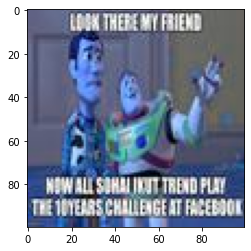

In [26]:
plt.imshow(image)